<a href="https://colab.research.google.com/github/Jack-Cruz/adherencia_repository/blob/main/C%C3%B3digo_del_modelo_Decision_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo para predicción de adherencia

En este informe se detalla cómo se implementó una solución de machine learning para la predicción de adherencia a un tratamiento médico.

## Desarrollo del modelo

### Análisis de los datos

In [ ]:
# Descargamo la librería 'tensorflow_decision_forest'
# Si estamos en google colaboratory: !pip install tensorflow_decision_forests
# Si estamos desde consola: pip install tensorflow_decision_forests

!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.0 MB 8.4 MB/s 
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 1.7 MB 43.1 MB/s 
     |████████████████████████████████| 438 kB 53.0 MB/s 
     |████████████████████████████████| 5.9 MB 39.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

In [ ]:
# Importamos las librerías de python necesarios

import tensorflow_decision_forests as tfdf # Librería para crear del modelo
import pandas as pd # Manejo de dataframes o tabla de datos
import matplotlib.pyplot as plt # Imprimir visualizaciones
import seaborn as sns # Imprimir visualizaciones
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report #Métricas de evaluación del modelo

In [ ]:
# Lectura de los datos desde el repositorio de Github

train_df = pd.read_csv("https://github.com/joao-arroyo/Datos/blob/434950ffbee0190ebb5ea8ab8b68bedf9448299e/DATA_TRAIN2.csv?raw=true")
test_df = pd.read_csv("https://github.com/joao-arroyo/Datos/blob/434950ffbee0190ebb5ea8ab8b68bedf9448299e/DATA_TEST2.csv?raw=true")

In [ ]:
# En las siguientes celdas se explora los datos tomandos como muestra el conjunto de entrenamiento
# Visualización de los 5 primeros registros

train_df.head(5)

,age,sex,marital status,Education,Medication preparation by,medication,SAMS_item1,SAMS_item3,SAMS_item6,SAMS_item10,SAMS_item11,SAMS_item15,SAMS_item16,SAMS_item17,SAMS_item19,SAMS_SUMA,Porcentaje,Adherencia
0,26,hombre,soltero,universitario o tecnico completo,vinculado,1,0,0,1,0,0,0,0,0,0,1,0.972222,1
1,53,mujer,casado,secundaria completa,vinculado,6,2,1,1,0,0,1,0,0,0,5,0.861111,1
2,76,hombre,viudo o divorciado,universitario o tecnico completo,vinculado,5,0,0,1,4,4,0,0,4,4,17,0.527778,0
3,33,mujer,casado,secundaria completa,vinculado,8,0,0,1,1,0,0,0,0,0,2,0.944444,1
4,59,hombre,casado,universitario o tecnico completo,vinculado,3,0,0,0,0,0,0,1,0,0,1,0.972222,1


In [ ]:
# Ver la dimensión

train_df.shape

(300, 18)

Del resultado anterior, se sabe que existen 300 registros y 18 columnas (variables).

In [ ]:
# Obtener información

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        300 non-null    int64  
 1   sex                        300 non-null    object 
 2   marital status             300 non-null    object 
 3   Education                  300 non-null    object 
 4   Medication preparation by  300 non-null    object 
 5   medication                 300 non-null    int64  
 6   SAMS_item1                 300 non-null    int64  
 7   SAMS_item3                 300 non-null    int64  
 8   SAMS_item6                 300 non-null    int64  
 9   SAMS_item10                300 non-null    int64  
 10  SAMS_item11                300 non-null    int64  
 11  SAMS_item15                300 non-null    int64  
 12  SAMS_item16                300 non-null    int64  
 13  SAMS_item17                300 non-null    int64  

En la gráfica anterior, se visualiza en nombre de la columna, la cantidad de no nulos (not-null) y el tipo de dato inferido (Dtype).

Se conoce que de las 18 columnas ninguna presenta vacío, además contamos con 1 dato de tipo decimal (float), 13 de tipo entero (int64) y 4 de tipo cadena (object).  

In [ ]:
train_df.describe()

,age,medication,SAMS_item1,SAMS_item3,SAMS_item6,SAMS_item10,SAMS_item11,SAMS_item15,SAMS_item16,SAMS_item17,SAMS_item19,SAMS_SUMA,Porcentaje,Adherencia
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,63.606667,5.266667,0.426667,0.266667,0.723333,0.143333,0.323333,0.506667,0.536667,0.226667,0.290000,3.443333,0.904352,0.863333
std,15.511306,3.748207,0.902221,0.759921,0.838131,0.700780,0.960136,0.972853,1.035485,0.798382,0.833596,4.842688,0.134519,0.344069
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000
25%,56.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888889,1.000000
50%,68.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.944444,1.000000
75%,75.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000
max,90.000000,21.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,35.000000,1.000000,1.000000


La tabla anterior es de tipo doble entrada, en el eje horizontal se muestran las variables numéricas, en el vertical, las descripciones cómo cantidad (count), media (mean), desviación estándar (std), mínimo (min), el percentil 25, 50, 75 y el máximo (max). Es importante resaltar que el percentil 50 tambien se conoce como mediana (median).

**Variable objetivo 'Adherencia'**

In [ ]:
# Distribución de la variable objetivo (target) 'Adherencia'
train_df['Adherencia'].value_counts()

1    259
0     41
Name: Adherencia, dtype: int64

In [ ]:
# El resultado anterior en porcentaje
train_df['Adherencia'].value_counts(normalize=True)

1    0.863333
0    0.136667
Name: Adherencia, dtype: float64

Del resultado anterior se conoce que existen 259 registros con adherencia y 41 pacientes con no adherencia. En términos de porcentaje tenemos 86.33% si adherentes, y 13.66% no adherentes.

**Variable 'age'**

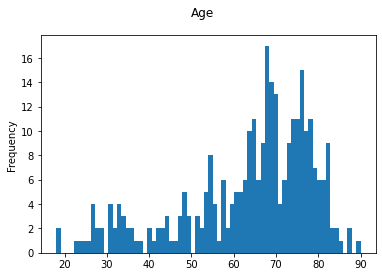

In [ ]:
# Visualización de la variables edad
train_df['age'].plot(kind='hist', bins=70, title='Age', subplots=True)
plt.show()

Del gráfico anterior, podemos inferir que existe un grueso de datos entre 60 y 80 años.

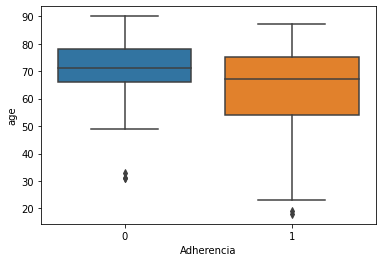

In [ ]:
# Gráfico de caja de la variable 'Adherencia' y 'age'

sns.boxplot(x='Adherencia', y='age', data=train_df)
plt.show()

Del gráfico anterior, podemos observar iferenciar entre azul (no adherente), y naranja (adherente).

**Vsriable 'sex'**

In [ ]:
# Distribución de la variable 'sex'

train_df['sex'].value_counts()

hombre    169
mujer     131
Name: sex, dtype: int64

In [ ]:
# El resultado anterior en porcentaje

train_df['sex'].value_counts(normalize=True)

hombre    0.563333
mujer     0.436667
Name: sex, dtype: float64

In [ ]:
# Distribución de 'adherencia' y 'sex'

pd.crosstab(train_df['Adherencia'], train_df['sex'])

sex,hombre,mujer
Adherencia,,
0,31,10
1,138,121


**Variable 'marital status'**

In [ ]:
# Variable marital status

train_df['marital status'].value_counts()

casado                197
viudo o divorciado     53
soltero                50
Name: marital status, dtype: int64

In [ ]:
# Distribución de 'adherencia' y 'marital status' 

pd.crosstab(train_df['Adherencia'], train_df['marital status'])

marital status,casado,soltero,viudo o divorciado
Adherencia,,,
0,24,6,11
1,173,44,42


**Variable 'Education'**

In [ ]:
# Distribución de la variable education

train_df['Education'].value_counts()

secundaria completa                   115
universitario o tecnico completo       76
primaria incompleta                    71
universitaria o tecnica incompleta     26
secundaria incompleta                  11
universitario o tecnico incompleto      1
Name: Education, dtype: int64

In [ ]:
# Distribución de 'Adherencia' y 'Education'

pd.crosstab(train_df['Adherencia'], train_df['Education'])

Education,primaria incompleta,secundaria completa,secundaria incompleta,universitaria o tecnica incompleta,universitario o tecnico completo,universitario o tecnico incompleto
Adherencia,,,,,,
0,9,14,3,4,11,0
1,62,101,8,22,65,1


**Variable 'Medication preparation by'**

In [ ]:
# Distribución de la variable 'Medication preparation by'

train_df['Medication preparation by'].value_counts()

vinculado       294
sin vincular      6
Name: Medication preparation by, dtype: int64

In [ ]:
# Distribución de la variable 'Medication preparation by' y 'Adherencia'

pd.crosstab(train_df['Adherencia'], train_df['Medication preparation by'])

Medication preparation by,sin vincular,vinculado
Adherencia,,
0,0,41
1,6,253


**Variable 'medication'**

In [ ]:
# Distribución de la variable 'medication'

train_df['medication'].value_counts()

3     39
5     34
2     32
4     29
6     27
7     27
0     21
1     21
8     20
10    17
9     10
14     7
15     6
11     4
12     4
21     1
20     1
Name: medication, dtype: int64

In [ ]:
# Distribución de la variable 'medication' y 'Adherencia'

pd.crosstab(train_df['Adherencia'], train_df['medication'])

medication,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,20,21
Adherencia,,,,,,,,,,,,,,,,,
0,3,2,1,3,2,6,5,2,4,3,5,0,0,3,2,0,0
1,18,19,31,36,27,28,22,25,16,7,12,4,4,4,4,1,1


**Variables 'SAMS_items'**

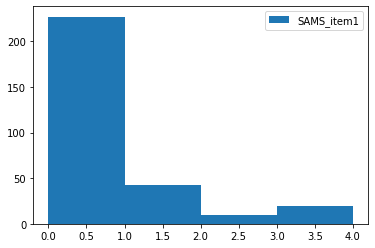

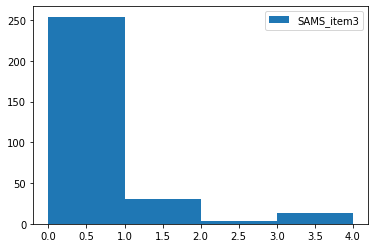

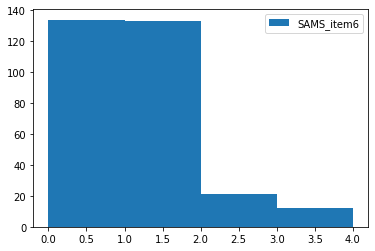

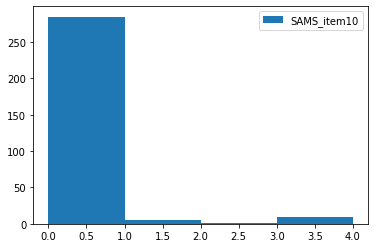

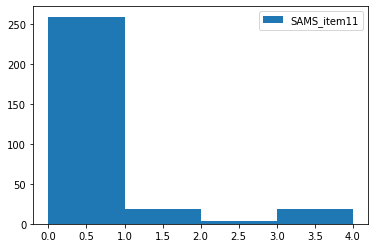

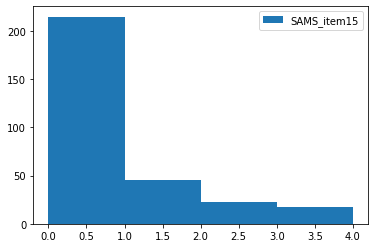

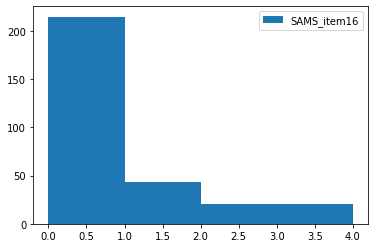

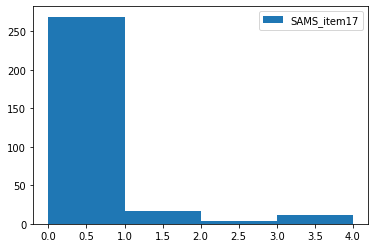

In [ ]:
# Visualización de las variables SAMS_items

sams_items = train_df.columns[6:14]
num_variables = len(sams_items)

for i, item in enumerate(sams_items):
    plt.hist(train_df[item], bins=4, label=item)
    plt.legend()
    plt.show()

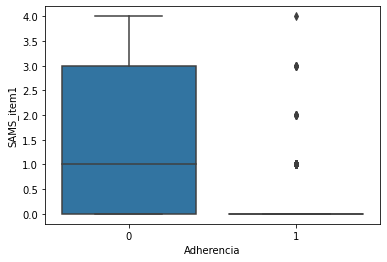

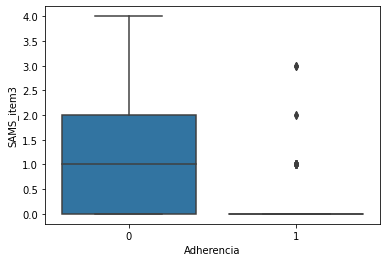

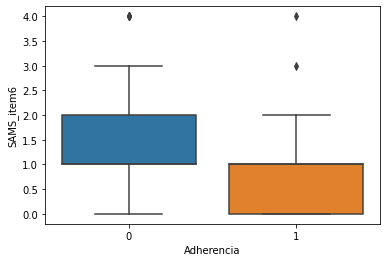

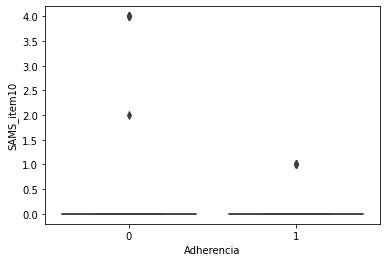

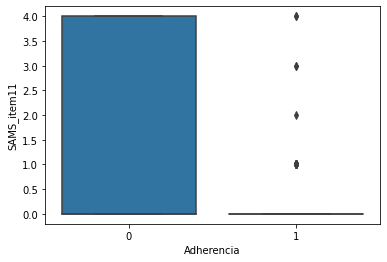

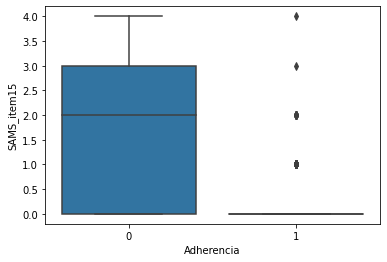

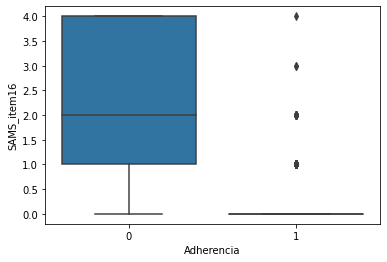

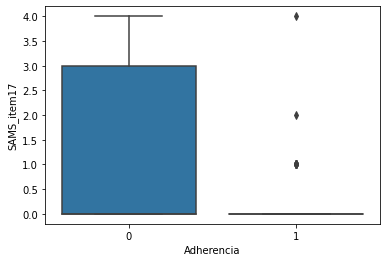

In [ ]:
# Gráfico de boxplot de las variables SAMS_items

for i, item in enumerate(sams_items):
    sns.boxplot(x='Adherencia', y=item, data=train_df)
    plt.show()

**Variable 'SAMS_SUMA'**

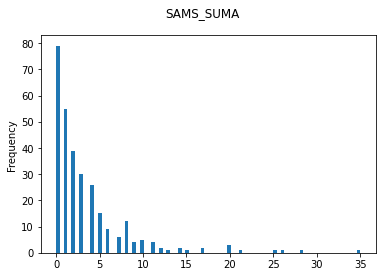

In [ ]:
# Distribución de la variable SAMS_SUMA

train_df['SAMS_SUMA'].plot(kind='hist', bins=80, title='SAMS_SUMA', subplots=True)
plt.show()

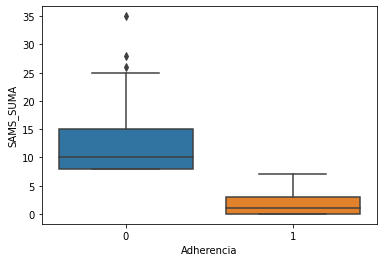

In [ ]:
# Gráfico de boxplot de las variable SAMS_SUMA

sns.boxplot(x='Adherencia', y='SAMS_SUMA', data=train_df)
plt.show()

**Variable 'Porcentaje'**

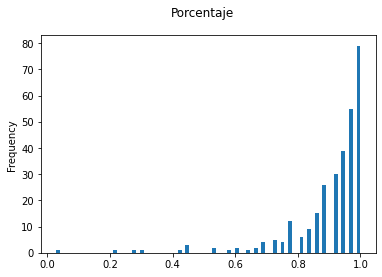

In [ ]:
train_df['Porcentaje'].plot(kind='hist', bins=80, title='Porcentaje', subplots=True)
plt.show()

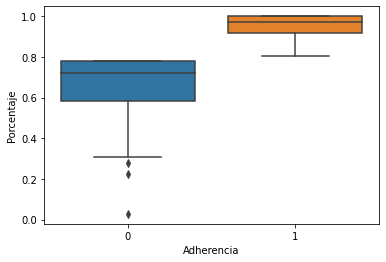

In [ ]:
sns.boxplot(x='Adherencia', y='Porcentaje', data=train_df)
plt.show()

### Creación del modelo

In [ ]:
# Seleccionamos las variables predictoras y objetivo para los datos de train y test

X = train_df.iloc[:, 0:15]
Y = train_df.iloc[:, 17]
train_df = X
train_df["result"] = Y

X = test_df.iloc[:, 0:15]
Y = test_df.iloc[:, 17]
y_test = Y
test_df = X
test_df["result"] = Y

In [ ]:
# Transformamos a tipo de datos tentor

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="result")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="result")

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core_inference.py:873: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [ ]:
# Creamos y entrenamos el modelo de decision forest

model = tfdf.keras.RandomForestModel()
model.fit(x=train_ds)

Use /tmp/tmp06n9hcu_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.357922. Found 300 examples.
Training model...
Model trained in 0:00:00.101276
Compiling model...
Model compiled.


### Evaluación y almacenamiento del modelo

In [ ]:
# Este código limita el alto de la venta de salida
# Para ejecutar se debe digitar '%set_cell_height 300'

from IPython.core.magic import register_line_magic
from IPython.display import Javascript
from IPython.display import display as ipy_display

# Some of the model training logs can cover the full
# screen if not compressed to a smaller viewport.
# This magic allows setting a max height for a cell.
@register_line_magic
def set_cell_height(size):
  ipy_display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

In [ ]:
# Imprimimos un resumen de la estructura modelo
%set_cell_height 300
model.summary()

<IPython.core.display.Javascript object>

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (15):
	Education
	Medication_preparation_by
	SAMS_item1
	SAMS_item10
	SAMS_item11
	SAMS_item15
	SAMS_item16
	SAMS_item17
	SAMS_item19
	SAMS_item3
	SAMS_item6
	age
	marital_status
	medication
	sex

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1. "Medication_preparation_by"  4.248712 ################
    2.                   "__LABEL"  4.248712 ################
    3.            "marital_status"  4.157069 ###############
    4.                       "sex"  4.139139 ###############
    5.                 "Education"  3.959038 #############
    6.                "medication"  3.871256 #############
    7.                   

Según el resumen anterior se sabe que existen 300 árboles de decision en el modelo.

In [ ]:
# Compilamos y evaluamos el modelo con la data de test

model.compile(metrics=["accuracy"])
model.evaluate(test_ds)

1/1 [==============================] - 0s 144ms/step - loss: 0.0000e+00 - accuracy: 0.9380


[0.0, 0.9379844665527344]

In [ ]:
# Descripción de las variables más importantes

model.make_inspector().variable_importances()

{'NUM_NODES': [("SAMS_item16" (1; #6), 447.0),
  ("SAMS_item15" (1; #5), 375.0),
  ("SAMS_item3" (1; #9), 351.0),
  ("SAMS_item1" (1; #2), 328.0),
  ("age" (1; #11), 320.0),
  ("medication" (1; #13), 276.0),
  ("SAMS_item6" (1; #10), 256.0),
  ("SAMS_item11" (1; #4), 250.0),
  ("Education" (4; #0), 228.0),
  ("SAMS_item19" (1; #8), 155.0),
  ("SAMS_item17" (1; #7), 151.0),
  ("SAMS_item10" (1; #3), 78.0),
  ("marital_status" (4; #12), 67.0),
  ("sex" (4; #14), 53.0)],
 'MEAN_MIN_DEPTH': [("Medication_preparation_by" (4; #1), 4.248712247447543),
  ("__LABEL" (4; #15), 4.248712247447543),
  ("marital_status" (4; #12), 4.157069408804704),
  ("sex" (4; #14), 4.139139049947874),
  ("Education" (4; #0), 3.9590383554354114),
  ("medication" (1; #13), 3.8712559782265665),
  ("age" (1; #11), 3.845659990880578),
  ("SAMS_item19" (1; #8), 3.7518050726506598),
  ("SAMS_item10" (1; #3), 3.66916429539959),
  ("SAMS_item6" (1; #10), 3.433957691001809),
  ("SAMS_item17" (1; #7), 3.3306547918312623),
 

In [ ]:
# Visualizaciones de árbol en el algorítmo decision forest

tfdf.model_plotter.plot_model_in_colab(model, tree_idx=21, max_depth=3)

In [ ]:
# Realizamos otra evaluación al modelo con la data de test
# En este almacenamos el output del modelo en 'y_pred_perc' y
# si es mayor a 0.80 (80%) entonces predice 1, sino 0. 

y_pred_perc = model.predict(test_ds)
y_pred = (y_pred_perc >= 0.50).astype(int)

1/1 [==============================] - 0s 91ms/step


In [ ]:
# Visualizamos las cinco primeras predicciones

y_pred[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
# Matriz de confusión

confusion_matrix(y_test, y_pred)

array([[ 12,   6],
       [  2, 109]])

In [ ]:
# Reporte de clasificación

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.95      0.98      0.96       111

    accuracy                           0.94       129
   macro avg       0.90      0.82      0.86       129
weighted avg       0.94      0.94      0.93       129



In [ ]:
# Curva AUC/ROC es una métrica que 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_perc)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.990990990990991

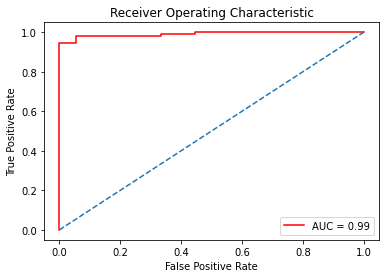

In [ ]:
# Visualización gráfica de AUC/ROC

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Almacenar el modelo en la carpeta /tmp/my_saved_model

model.save("/tmp/my_saved_model")

Resumen del código de entrenamiento

In [ ]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_decision_forests as tfdf
import pandas as pd

train_df = pd.read_csv("https://github.com/joao-arroyo/Datos/blob/434950ffbee0190ebb5ea8ab8b68bedf9448299e/DATA_TRAIN2.csv?raw=true")
test_df = pd.read_csv("https://github.com/joao-arroyo/Datos/blob/434950ffbee0190ebb5ea8ab8b68bedf9448299e/DATA_TEST2.csv?raw=true")

X = train_df.iloc[:, 0:15]
Y = train_df.iloc[:, 17]
train_df = X
train_df["result"] = Y

X = test_df.iloc[:, 0:15]
Y = test_df.iloc[:, 17]
y_test = Y
test_df = X
test_df["result"] = Y

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="result")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="result")

# Train a Random Forest model.
model = tfdf.keras.RandomForestModel()
model.fit(x=train_ds)

# Summary of the model structure.
model.summary()
model.compile(metrics=["accuracy"])

# Evaluate model
evaluation = model.evaluate(test_ds)
print(f"Binary Cross entropy loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")

# Export the model
print('Saving...')
model.save("./tmp/my_saved_model")

model.make_inspector().variable_importances()

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core_inference.py:873: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


Use /tmp/tmp_6xduc10 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.276877. Found 300 examples.
Training model...
Model trained in 0:00:00.090128
Compiling model...
Model compiled.
Model: "random_forest_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (15):
	Education
	Medication_preparation_by
	SAMS_item1
	SAMS_item10
	SAMS_item11
	SAMS_item15
	SAMS_item16
	SAMS_item17
	SAMS_item19
	SAMS_item3
	SAMS_item6
	age
	marital_status
	medication
	sex

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1. "Medication_preparation_by"  4.248712 ################
    2.                   "__LABEL"  4.248712 ################
    3.            "marital_status"  4.

{'NUM_AS_ROOT': [("SAMS_item16" (1; #6), 95.0),
  ("SAMS_item15" (1; #5), 65.0),
  ("SAMS_item11" (1; #4), 55.0),
  ("SAMS_item17" (1; #7), 36.0),
  ("SAMS_item10" (1; #3), 15.0),
  ("SAMS_item3" (1; #9), 12.0),
  ("SAMS_item1" (1; #2), 8.0),
  ("SAMS_item6" (1; #10), 7.0),
  ("SAMS_item19" (1; #8), 6.0),
  ("age" (1; #11), 1.0)],
 'NUM_NODES': [("SAMS_item16" (1; #6), 447.0),
  ("SAMS_item15" (1; #5), 375.0),
  ("SAMS_item3" (1; #9), 351.0),
  ("SAMS_item1" (1; #2), 328.0),
  ("age" (1; #11), 320.0),
  ("medication" (1; #13), 276.0),
  ("SAMS_item6" (1; #10), 256.0),
  ("SAMS_item11" (1; #4), 250.0),
  ("Education" (4; #0), 228.0),
  ("SAMS_item19" (1; #8), 155.0),
  ("SAMS_item17" (1; #7), 151.0),
  ("SAMS_item10" (1; #3), 78.0),
  ("marital_status" (4; #12), 67.0),
  ("sex" (4; #14), 53.0)],
 'MEAN_MIN_DEPTH': [("Medication_preparation_by" (4; #1), 4.248712247447543),
  ("__LABEL" (4; #15), 4.248712247447543),
  ("marital_status" (4; #12), 4.157069408804704),
  ("sex" (4; #14), 4.13

## Despliegue del modelo

### Preparación del entorno de ejecución

En el proceso de despliegue se usará el servicio de TensorFlow Serving (TF-Serving), este contiene archivos necesarios para levantar un servidor en una máquina virtual. Sin embargo, debido a que TF-Serving no soporta nativamente TensorFlow es necesario compilar TF-Serving desde la fuente de código. Se puede encontrar más información en la documentación de TensorFlow [link](https://www.tensorflow.org/decision_forests/tensorflow_serving) *(Nota: Si no aparece TF-Serving, cambiar el idioma de la página a Inglés).*

Otra forma de usar TF-Serving es a través de archivos compilados por otros desarrolladores, estos se comparten a través de un repositorio [link](https://github.com/tensorflow/decision-forests/releases), buscamos el archivo denominado 'tensorflow_model_server_linux.zip' en la sección de Assets.

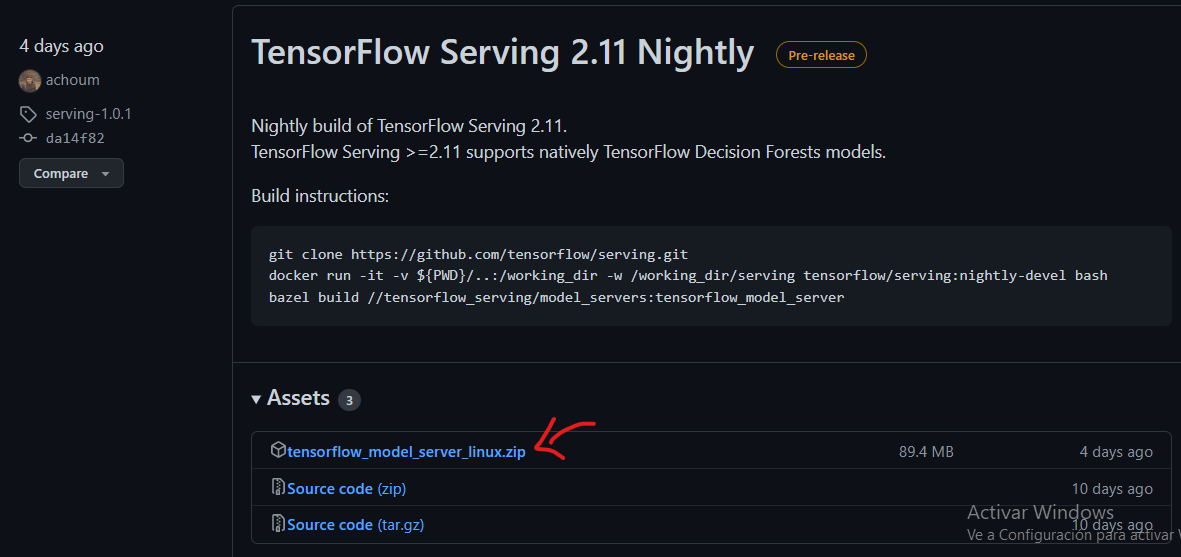

Otro de los pasos importantes, es descargar el modelo desde este entorno como Google Colaboratory (Colab),
para ello en la instrucción anterior, se definió guardar el modelo en la siguiente dirección.

> 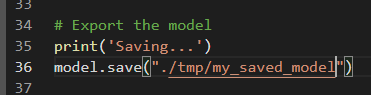

Dado que Colab no permite descargar carpetas, crear la estructura de carpetas y descargar los archivos uno a uno. En el paso 1 ubicamos los archivos, en paso 2, descargamos los archivos, y en el 3 creamos carpetas que se asemejen a las carpetas del modelo de google colab (tmp->my_saved_model->assets/variables) y almacenamos los archivos correspondientes.

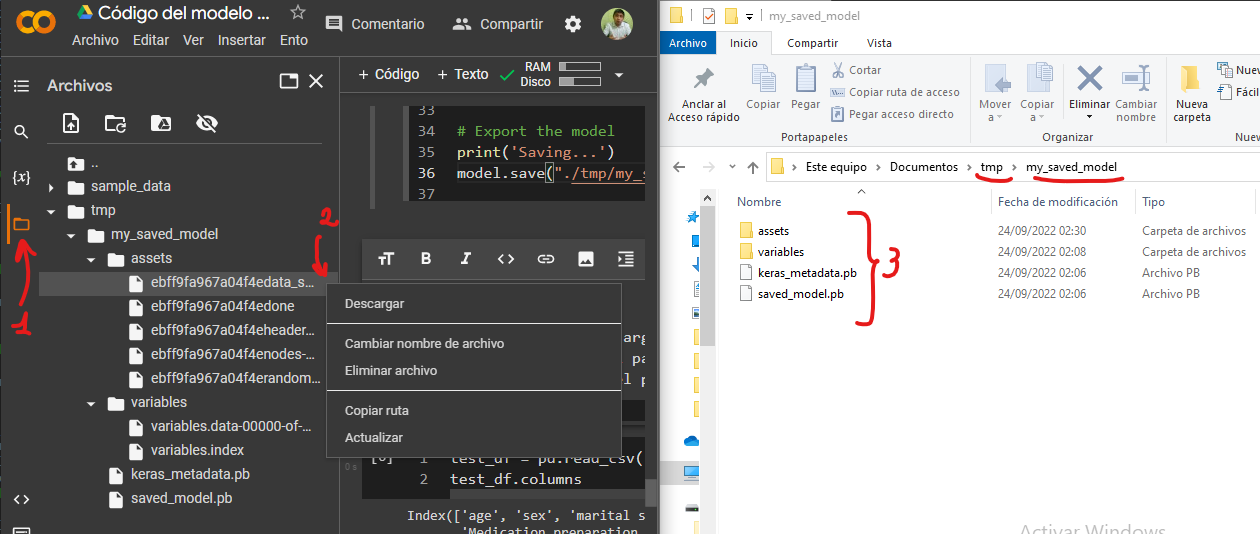

Luego, necesitamos un servidor físico o virtual para levantar el servicio de TensorFlow Serving, hemos decido usar el servicio de AWS, el cual nos brinda recursos de computo, almacenamiento, redes, etc. Se instanción una máquina EC2 con las siguientes características:

* Tipo de instancia: t2-micro
* Sistema operativo (imágen): Ubuntu
* Almacenamiento: Elástic Block Store (EBS) de 16 GiB
* Elastic IP Address: 1 El precio estimado de dicha instancia es de 10.07 USD mensuales, y 120.84 USD anuales.

Referencia de la siguiente imágen [link](https://calculator.aws/#/estimate?nc2=pr&id=6e078a4000431dd39dc9af80a5375fc5ab0e05e9)

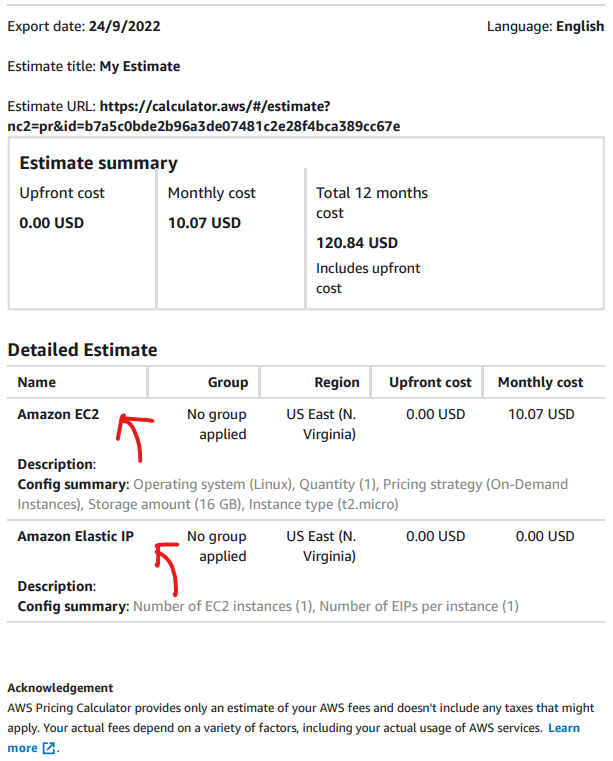

Es importante saber que AWS tiene una capa gratuita, donde podemos usar servicios EC2 por 750 horas en el tipo t2.micro, además, Elastic Block Storage por 30 GB, y dado que el Elastic IP no tiene costo cuando es asociado a un máquina EC2, el costo por un año será 0 soles.

Link para ver servicios de la capa gratuita [link](https://aws.amazon.com/es/free/?all-free-tier.sort-by=item.additionalFields.SortRank&all-free-tier.sort-order=asc&awsf.Free%20Tier%20Types=*all&awsf.Free%20Tier%20Categories=categories%23compute&awsf.tech-category=tech-category%23storage)

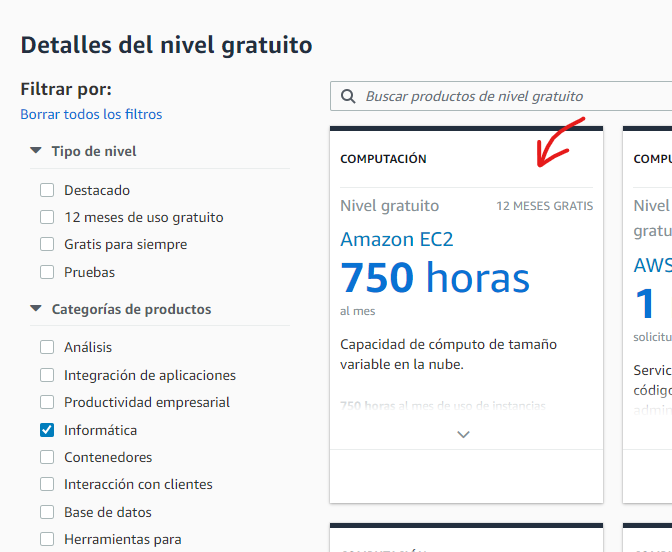


**Instanciar un máquina ubuntu**

Ingresamos a la consola de AWS, buscamos instancias EC2.
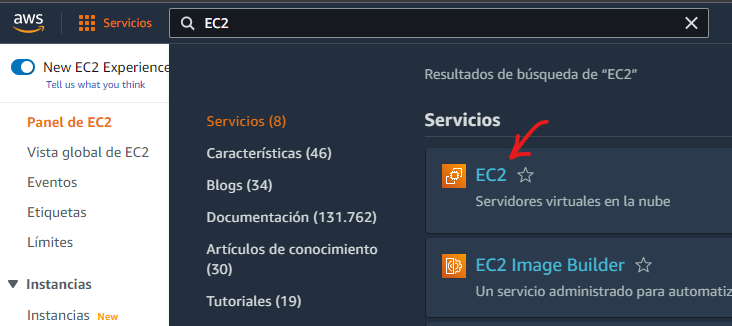

Dentro de la sección 'Recursos', nos dirigimos a 'Instancias'. Luego, en el extramo superior derecho ubicamos la opción 'Lanzar instancia' y damos click.

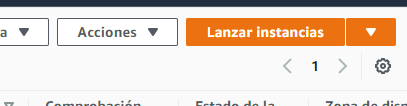

Entonces, le colocamos un nombre, en la sección de imágenes, seleccionamos Ubuntu.

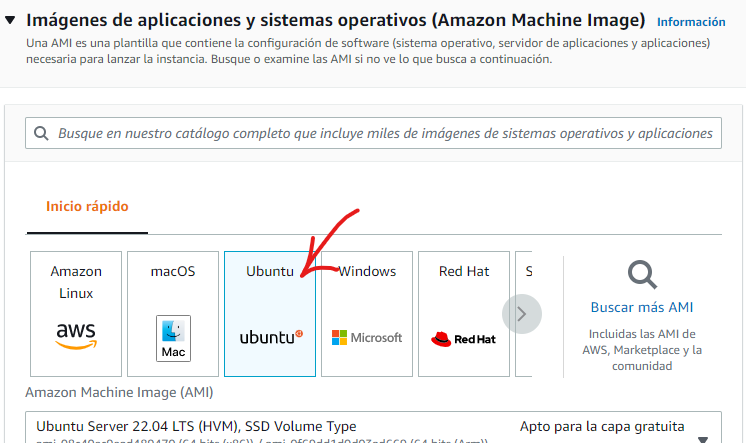

En el tipo de instancia, seleccionamos el tipo 't2.micro'.

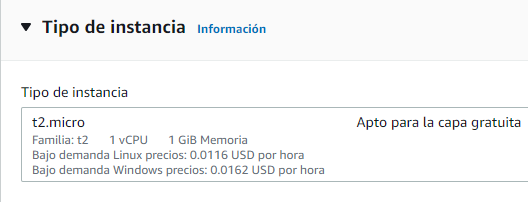

Generamos un par de claves y lo almacenamos en un lugar seguro, pues ello se usará para conectarnos al servidor.
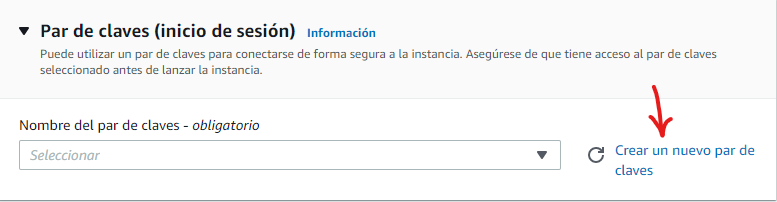

Para crear las llaves, colocamos un nombre, y dejamos los parámetros por defecto.
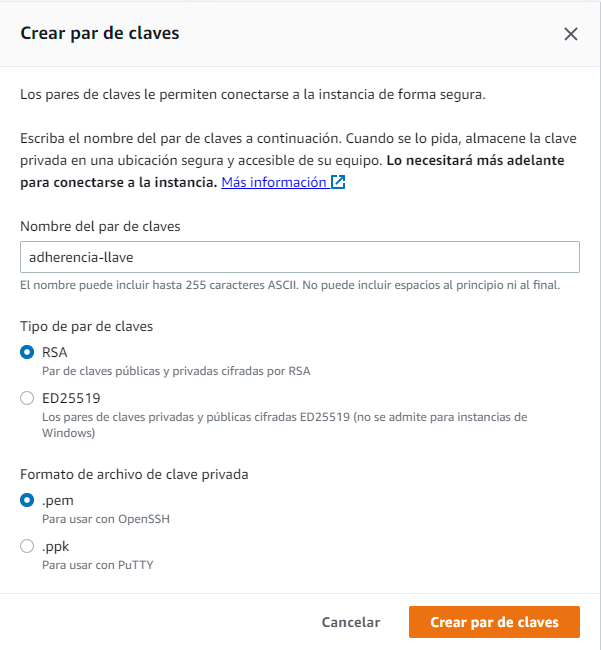

En las configuraciones de red, activamos la opción para permitir el tráfico HTTPs desde internet.
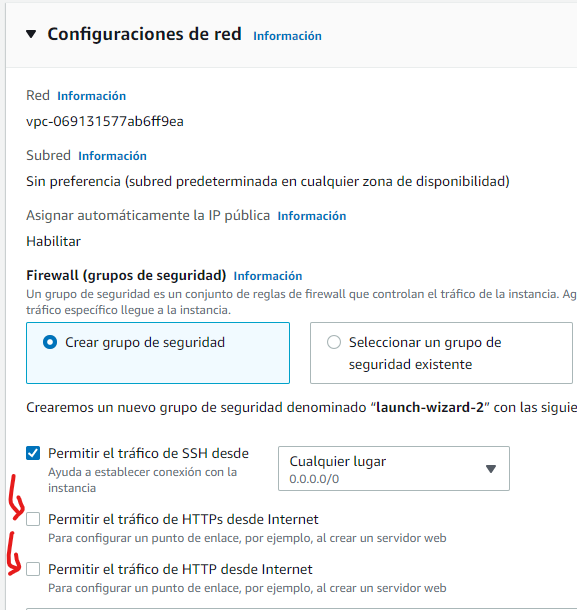

En el lado derecho verificamos que cumpla con las siguientes características y le damos en lanzar instancia.

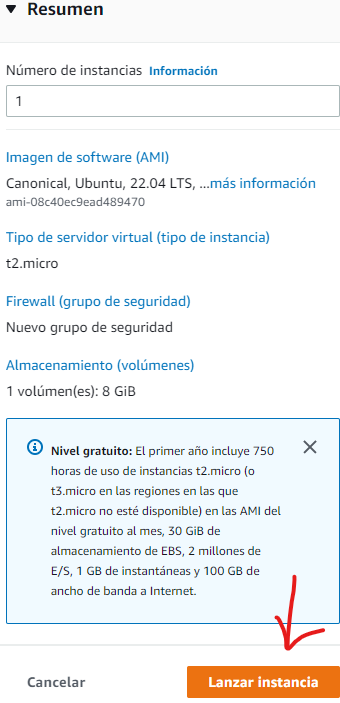

### Inciar el servicio TensorFlow Serving

Despues de haber creado el servidor, necesitamos conectarnos a este, durante el proyecto usamos dos tipos:
- Conexión a través de SSH
- Conexión a través del software WinSCP

Antes de realizar la conexión debemos asegurarnos que el servidor se encuentre corriendo y que ha pasado los filtros de seguridad, como en la siguiente imágen (capturada desde la Consola de Administración de AWS).

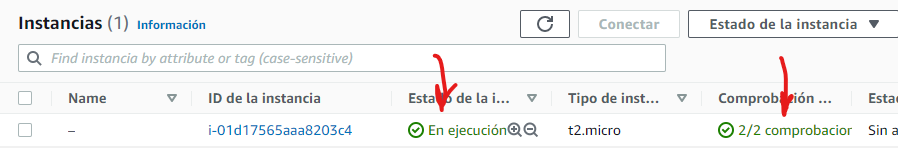



**Conexión a través de SSH**

En la sección de instancias de EC2, seleccionamos nuestra instancia actual y picamos en el botón 'Conectar'.
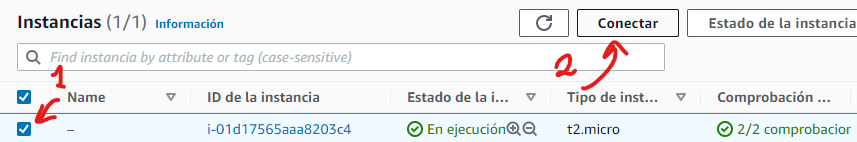

Seleccionamos la ventana 'Cliente SSH', copiamos el comando de la sección 'ejemplo'.
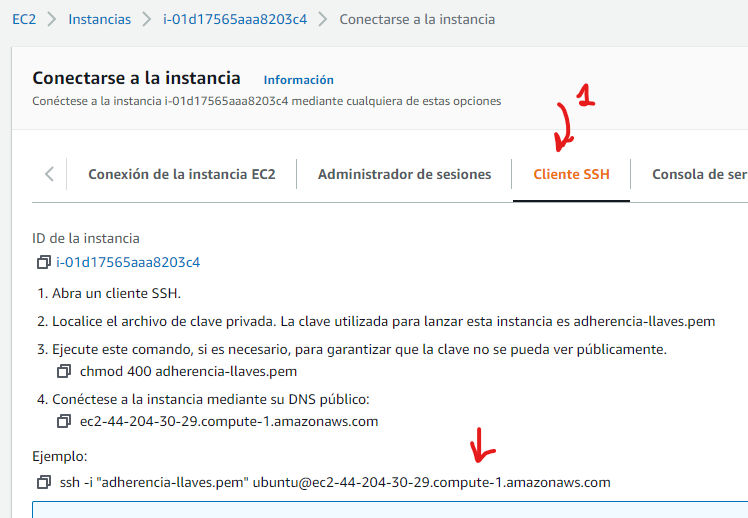


Antes del siguiente paso, es necesario tener la clave (llave) generada durante la creación del servidor en el equipo.

Abrimos una ventana de comandos (terminal), nos movemos por carpetas con el comando **cd <nombre de la carpeta\>** (en mis caso lo tengo en descargas).

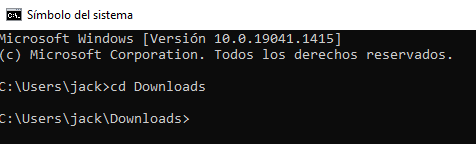


Pegamos el comando de ejemplo de AWS (usar el anticlick), y nos conectamos en la instancia. Usaremos esta conexión para levantar comandos, en pasos posteriores.

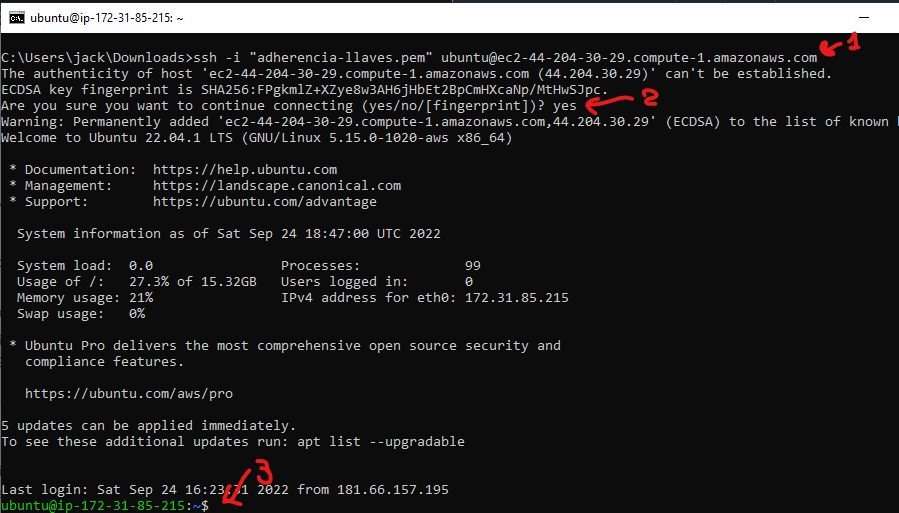

**Comandos Importantes**

En la terminal podemos ejecutar comandos importantes como:
* **ls**: Visualizar los archivos en el directorio actual
* **cd <foldername\>**: Entrar a un directorio específico.
* **cd ..**: Salir del directorio actual.
* **pwd**: Para visualizar la ruta del directorio actual.
* **top**: Visualizar los procesos ejecutando

En la interfaz que aparece en el comando *top*:
* **q**: Para salir de la ventana
* **k**: Para eliminar un eliminar un proceso (es necesario conocer el PID del proceso).

**Conexión a través del software WinSCP**

Descargar el software desde el siguiente [link](https://winscp.net/eng/index.php).

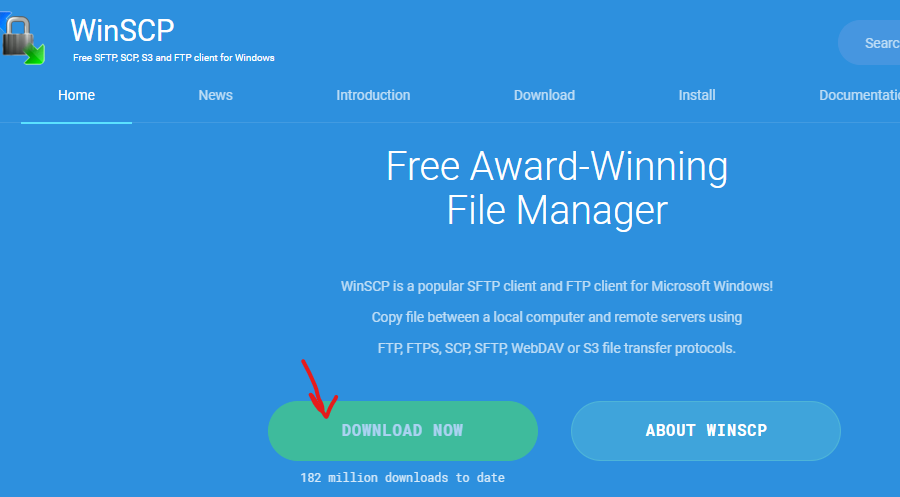

Luego, hacemos click en descarga el archivo.

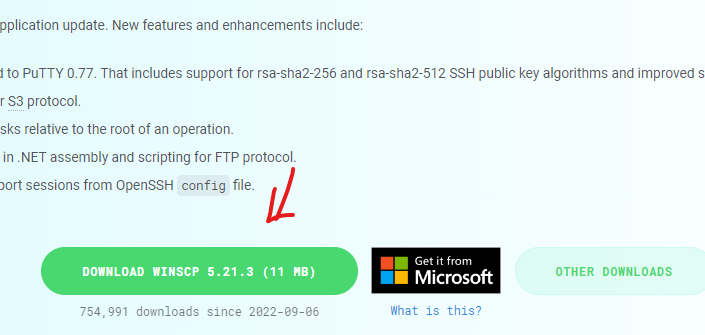

Iniciarmos una nueva sesión (1), insertamos la identificación del servidor (2, 3, 4), luego, le damos click en avanzado (5), vamos a autenticación (6), agregamos las llaves (archivo .ppk) (7), y procedemos a conectarnos.

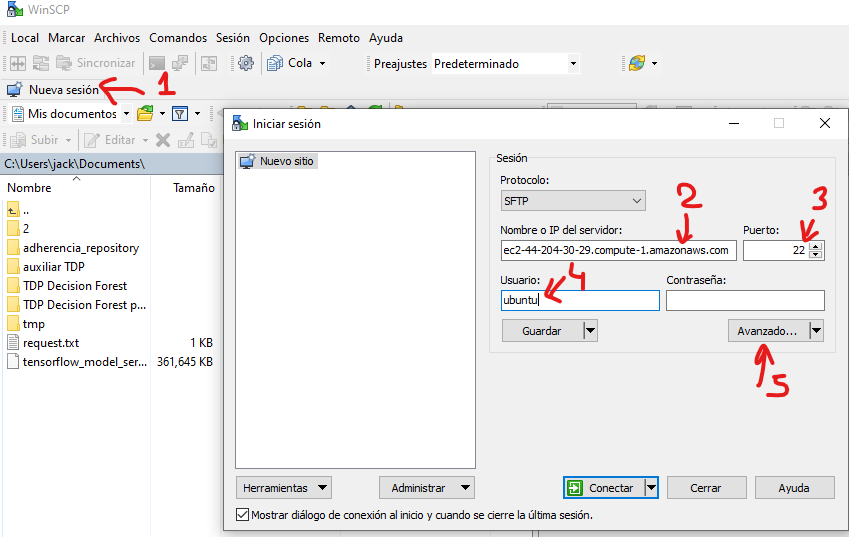

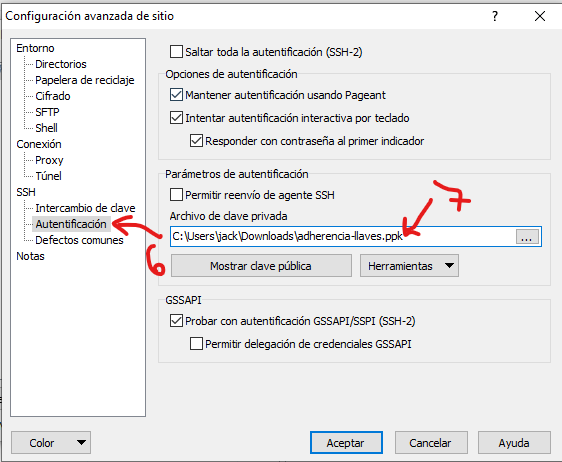

Cuando estemos dentro debemos pasar el archivo 'tensorflow_model_server' y la carpeta del modelo. En el lado izquierdo se muestra la carpeta del sistema operativo local (windows) y en el derecho se muestra los archivos del servidor. Es importante seguir la estructura de carpetas mostradas a continuación, es decir el modelo se debe almacenar dentro de -/home/ubuntu/tmp/my_saved_model_with_version/1/.

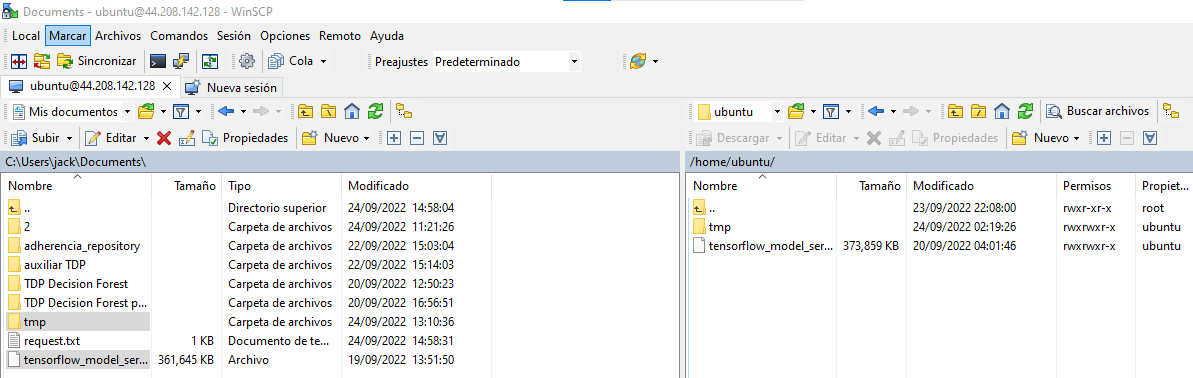


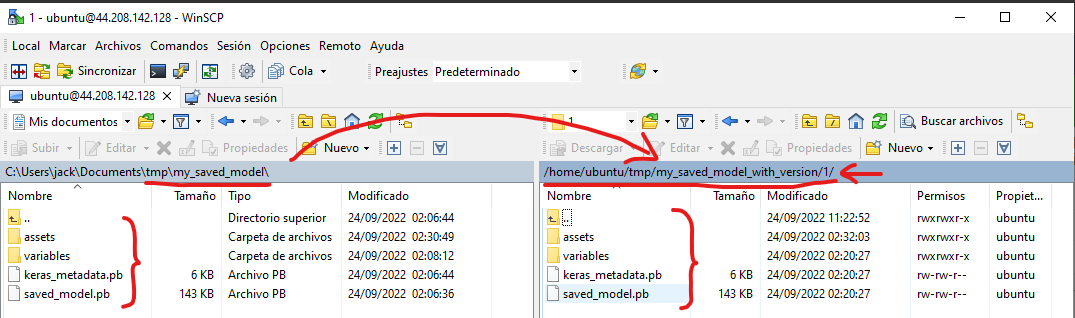

Ahora regresamos a la conexión por SSH, vamos a ejecutar los comandos para levantar el servicio. Los comandos fueron obtenidos de la fuente github [link](https://github.com/tensorflow/decision-forests/tree/main/tools/tf_serving).

Los siguientes comandos permiten almacenar variables y iniciar el servicio 'tensorflow_model_server'.
```
$ TFSERVING=./tensorflow_model_server
$ MODEL_PATH=/home/ubuntu/tmp/my_saved_model_with_version
$ MODEL_NAME=my_model
$ chmod +x ${TFSERVING} 
$ ${TFSERVING} --rest_api_port=8501 --model_name=${MODEL_NAME} --model_base_path=${MODEL_PATH} &
```
Damos un 'enter' y debemos tener habilitado los comandos, como se muestra en la siguiente imágen.

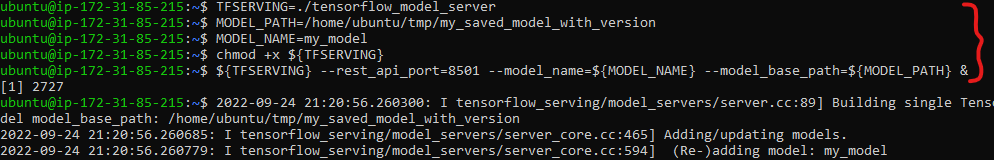


En los pasos siguientes se realizaran las pruebas, luego de ello, para cerrar la consola, se usará el comando **CTR + D**, esto es para que el servicio de tensorflow serving siga ejecutando, incluso si cerramos la conexión. Por otro lado, si cerramos la ventana desde el botón **X** puede suceder que se apaga el servicio de tensorflow serving. 

### Relizando peticiones (pruebas)

Se realizará la prueba desde dos entornos, uno interno (dentro del servidor, localhost) y otro externo (a través de internet, con la dirección IP). 

**1° prueba (interno)**

Dentro de la consola del servidor, ejecutamos la instrucción:
```
curl http://localhost:8501/v1/models/${MODEL_NAME}:predict -X POST \
    -d '{"instances": [{"age":83,"sex":"hombre","marital_status":"viudo o divorciado","SAMS_item10":0,"Education":"primaria completa","Medication_preparation_by":"vinculado","medication":4,"SAMS_item1":0,"SAMS_item3":0,"SAMS_item6":0,"SAMS_item11":0,"SAMS_item15":0,"SAMS_item16":0,"SAMS_item17":0,"SAMS_item19":1}]}'
```

El resultado se muestra a continuación.
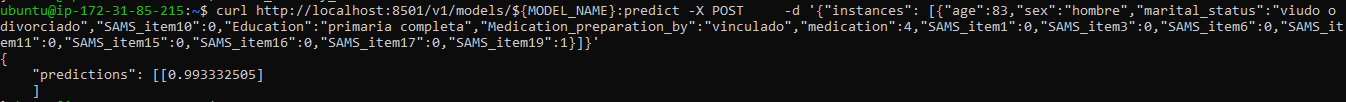

**2° prueba (externo)**

Debemos ejecutar el comando anterior, sin embargo, debemos cambiar algunos parámetros como se muestra a continuación.

Antes:
```
curl http://localhost:8501/v1/models/${MODEL_NAME}:predict -X POST \
    -d '{"instances": [{"age":83,"sex":"hombre","marital_status":"viudo o divorciado","SAMS_item10":0,"Education":"primaria completa","Medication_preparation_by":"vinculado","medication":4,"SAMS_item1":0,"SAMS_item3":0,"SAMS_item6":0,"SAMS_item11":0,"SAMS_item15":0,"SAMS_item16":0,"SAMS_item17":0,"SAMS_item19":1}]}'
```
Ahora:
```
curl http://44.208.142.128:8501/v1/models/my_model:predict -X POST \
    -d '{"instances": [{"age":83,"sex":"hombre","marital_status":"viudo o divorciado","SAMS_item10":0,"Education":"primaria completa","Medication_preparation_by":"vinculado","medication":4,"SAMS_item1":0,"SAMS_item3":0,"SAMS_item6":0,"SAMS_item11":0,"SAMS_item15":0,"SAMS_item16":0,"SAMS_item17":0,"SAMS_item19":1}]}'
```

Esto lo ejecutaremos en un entorno linux o tambien desde el google-colab, para el segundo caso, debemos anteponer el comando con **!** como se muestra a continuación.

In [ ]:
!curl http://44.208.142.128:8501/v1/models/my_model:predict -X POST \
    -d '{"instances": [{"age":83,"sex":"hombre","marital_status":"viudo o divorciado","SAMS_item10":0,"Education":"primaria completa","Medication_preparation_by":"vinculado","medication":4,"SAMS_item1":0,"SAMS_item3":0,"SAMS_item6":0,"SAMS_item11":0,"SAMS_item15":0,"SAMS_item16":0,"SAMS_item17":0,"SAMS_item19":1}]}'

{
    "predictions": [[0.993332505]
    ]
}

**3° prueba (externo)**

Otra forma que se consideró implementar es un código python que realice peticiones al servidor y obtenga una predicción, ello se muestra a continuación.

In [ ]:
import json
import requests

print('Making single prediction')
host = '44.208.142.128'
port = '8501'
data = {'age': [83],
    'sex': ['hombre'],
    'marital_status': ['viudo o divorciado'],
    'Education': ['primaria completa'],
    'Medication_preparation_by': ['vinculado'],
    'medication': [4],
    'SAMS_item1': [0],
    'SAMS_item3': [0],
    'SAMS_item6': [0],
    'SAMS_item10': [0],
    'SAMS_item11': [0],
    'SAMS_item15': [0],
    'SAMS_item16': [0],
    'SAMS_item17': [0],
    'SAMS_item19': [1]}

json = {"inputs": data}
if __name__ == '__main__':
    server_url = 'http://' + host + ':' + port + '/v1/models/my_model:predict'
    response = requests.post(server_url, json=json)
    data = response.json()
    value = data['outputs'][0][0]
    print('Adherencia' if value > 0.80 else 'No adherencia')
    print('value output:', data)

Making single prediction
Adherencia
value output: {'outputs': [[0.993332505]]}


**4° prueba (externo)**
La útlima prueba que se realizó es a través del software Postman, a continuación se muestra la configuración de la petición, el método (1), url (2), body (3).

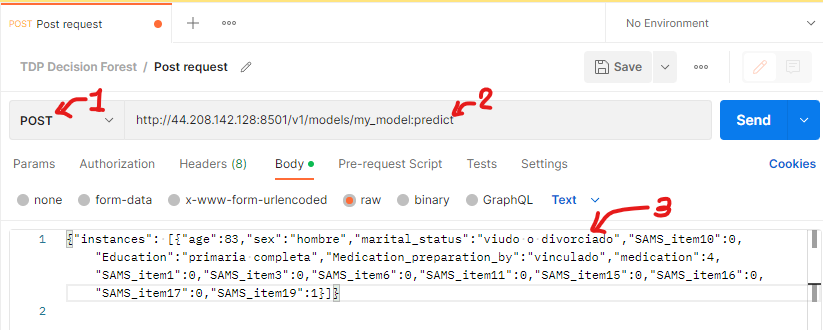

El resultado se muestra a continuación.

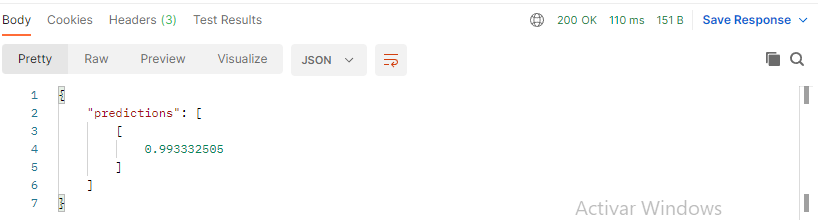

## Referencias
- Tutorial de tensorflowlite (principal): [link](https://www.tensorflow.org/decision_forests/tensorflow_serving)
- Github de TF-DF + TF-Serving: [link](https://github.com/tensorflow/decision-forests/tree/main/tools/tf_serving)
- Transferir archivos AWS: [link](https://docs.aws.amazon.com/managedservices/latest/appguide/qs-file-transfer.html)
- Cómo conectarse a través de WinSCP: [link](https://protocoderspoint.com/how-to-connect-to-aws-server-instance-ec2-using-winscp/)
- Conectar a AWS Elastic IP: [link](https://intellipaat.com/blog/aws-elastic-ip/)
- Como terminar un proceso en ubuntu linux: [link](https://phoenixnap.com/kb/how-to-kill-a-process-in-linux#:~:text=1%20Key%20Takeaways%20on%20Terminating%20a%20Linux%20Process,the%20killall%2C%20pkill%2C%20kill%2C%20xkill%20or%20top%20commands.)